In [1]:
import pandas as pd

In [2]:
import numpy as np

http://pandas.pydata.org/pandas-docs/stable/10min.html
原版见 十分钟搞定pandas

# DataFrame定义方式

In [3]:
dates=pd.date_range("20170301",periods=8)

pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
Return a fixed frequency DatetimeIndex.  返回一个固定频率的日期索引
* start 日期类型或者类日期的字符 产生日期的左边界
* stop ……，产生日期的右边界
* periods 整数（可选）
* periods：整数 产生多少天
* freq : str or DateOffset, default ‘D’ (calendar daily) Frequency strings can have multiples, e.g. ‘5H’. See here for a list of frequency aliases. 表明 那个periods是在什么单位级别上产生几个日期 

In [4]:
dates

DatetimeIndex(['2017-03-01', '2017-03-02', '2017-03-03', '2017-03-04',
               '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08'],
              dtype='datetime64[ns]', freq='D')

## 方式一

In [5]:
df=pd.DataFrame(np.random.randn(8,5),index=dates,columns=list('ABCDE'))

In [6]:
df

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082
2017-03-08,-2.558205,-0.345054,0.381374,-0.635037,1.195350


命令7中 第一个参数是df这个DataFrame的数据，第二个参数是索引（主键，想象一个excel表格，左边一列和第一行都是一些标题，这个index就是最左边的那列）
第三个参数是特征名称，列名，list字符串，就是把字符串序列化，变成['A','B'……]同时还可以看到，jupter中的表格好看，写论文直接用这个表格好了，虽然Matplotlib用show显示不出来图，但是直接使用plot的图还是可以看的，加油，而且确实显示的比IDE的好看，下次试试ipython的，哪个好看用哪个

In [7]:
df2=pd.DataFrame({"A":1,"B":pd.Timestamp("20170301"),"C":pd.Series(1,index=list(range(4)),dtype="float32"),"D":np.array([3]*4,dtype="float32"),"E":pd.Categorical(["police","student","teacher","doctor"])})

In [8]:
df2

,A,B,C,D,E
0,1,2017-03-01,1.0,3.0,police
1,1,2017-03-01,1.0,3.0,student
2,1,2017-03-01,1.0,3.0,teacher
3,1,2017-03-01,1.0,3.0,doctor


# 基本操作

In [9]:
df.head(3)

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529


打印出前几行

In [10]:
df.tail(3)

,A,B,C,D,E
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082
2017-03-08,-2.558205,-0.345054,0.381374,-0.635037,1.195350


打印出倒数几行，倒序

In [11]:
df.index

DatetimeIndex(['2017-03-01', '2017-03-02', '2017-03-03', '2017-03-04',
               '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08'],
              dtype='datetime64[ns]', freq='D')

直接打印出索引

In [12]:
df.values

array([[-0.1709084 ,  0.4496138 ,  0.81196736, -0.3802661 ,  0.37402868],
       [ 1.25165322,  0.25161636,  0.91540333,  2.55995504,  0.34498155],
       [-1.29824839, -0.61049315,  0.64653843,  1.48845979,  0.45252872],
       [-0.78118513,  0.26310747,  0.64391519,  0.07619529, -0.8511079 ],
       [ 0.18852463,  0.29549757, -1.4919531 ,  0.94110616,  0.18370825],
       [-0.53611757,  0.86775171,  0.74967647,  0.51976723, -0.90075798],
       [ 0.74092757,  1.40846806, -0.89680327,  1.55367815,  0.7210825 ],
       [-2.55820543, -0.34505372,  0.38137419, -0.6350371 ,  1.1953503 ]])

这里只有值 没有index或者column 所以少了一行 一列 只有数据部分的8×5

In [13]:
df.T

,2017-03-01 00:00:00,2017-03-02 00:00:00,2017-03-03 00:00:00,2017-03-04 00:00:00,2017-03-05 00:00:00,2017-03-06 00:00:00,2017-03-07 00:00:00,2017-03-08 00:00:00
A,-0.170908,1.251653,-1.298248,-0.781185,0.188525,-0.536118,0.740928,-2.558205
B,0.449614,0.251616,-0.610493,0.263107,0.295498,0.867752,1.408468,-0.345054
C,0.811967,0.915403,0.646538,0.643915,-1.491953,0.749676,-0.896803,0.381374
D,-0.380266,2.559955,1.488460,0.076195,0.941106,0.519767,1.553678,-0.635037
E,0.374029,0.344982,0.452529,-0.851108,0.183708,-0.900758,0.721082,1.195350


想想一下excel表格，转置就是把标题行和标题列交换，这里就是从8×5变成了5×8

In [14]:
df.sort_values(by=["C"])

,A,B,C,D,E
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082
2017-03-08,-2.558205,-0.345054,0.381374,-0.635037,1.195350
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982


pandas的0.23版本中已经没有df.sort(columns="C") 这样的排序函数了
取而代之的是 df.sort_values()和df.sort_index()函数 默认升序
使用ascending false表示降序
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

In [15]:
df.sort_values(by=["C"], ascending=[False])

,A,B,C,D,E
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-08,-2.558205,-0.345054,0.381374,-0.635037,1.195350
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708


不仅可以使用单列进行排序，还可以使用多列

In [16]:
df.sort_values(by=["C","D"], ascending=[False,False])

,A,B,C,D,E
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-08,-2.558205,-0.345054,0.381374,-0.635037,1.195350
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708


In [17]:
df.sort_index(axis=1, ascending=False)

,E,D,C,B,A
2017-03-01,0.374029,-0.380266,0.811967,0.449614,-0.170908
2017-03-02,0.344982,2.559955,0.915403,0.251616,1.251653
2017-03-03,0.452529,1.488460,0.646538,-0.610493,-1.298248
2017-03-04,-0.851108,0.076195,0.643915,0.263107,-0.781185
2017-03-05,0.183708,0.941106,-1.491953,0.295498,0.188525
2017-03-06,-0.900758,0.519767,0.749676,0.867752,-0.536118
2017-03-07,0.721082,1.553678,-0.896803,1.408468,0.740928
2017-03-08,1.195350,-0.635037,0.381374,-0.345054,-2.558205


结合之前对axis的理解 这里axis=0 是最外层，也就是说0[所有数据] 1[每行数据] 
这里是对索引排序，所以axis=1的时候 每行的索引也就是A-E进行排序，默认升序，所以这里false是降序，26个字母排序，E>D>C>B>A

sort_index有一个参数
inplace : bool, default False

if True, perform operation in-place
意思是 inplace如果为true 则执行原地操作，也就是在原DataFrame上进行修改

In [18]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D,E
2017-03-08,-2.558205,-0.345054,0.381374,-0.635037,1.195350
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029


同理，axis=0 所有数据，对index进行排序（行索引 左边这个） 降序

In [19]:
df.describe()

,A,B,C,D,E
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,-0.395445,0.322564,0.220015,0.765482,0.189977
std,1.198623,0.634504,0.900816,1.082630,0.726369
min,-2.558205,-0.610493,-1.491953,-0.635037,-0.900758
25%,-0.910451,0.102449,0.061830,-0.037920,-0.074996
50%,-0.353513,0.279303,0.645227,0.730437,0.359505
75%,0.326625,0.554148,0.765249,1.504764,0.519667
max,1.251653,1.408468,0.915403,2.559955,1.195350


这个函数返回每列的一些常见统计指标
* count（每列的元素个数）
* mean（每列的平均值）
* std   标准差
* min   最小值
* max   最大值
* 25%   较低的百分位数,又称第一个四分位数 最小四分位
* 50%   第二个四分位数，又称中位数 中位数是第50百分位数
* 默认情况下，较低的百分位数为25，较高的百分位数为75.50百分位数与中位数相同
* 75% 第75百分位数又称为第三个四分位数 上四分位
对于数值型数据，返回的结果的索引将包括计数，平均值，标准差，最小值，最大值以及更低的百分位数，50百分位数和更高的百分位数。
默认情况下，较低的百分位是25，而较高的百分位是75.50百分位与中位数相同。

对于对象数据（例如字符串或时间戳），结果的索引将包括count，unique，top和freq。top是最常见的值（也就是出现频率最高的，出现次数最多的值）。频率是最常见的值的频率。时间戳还包括第一个和最后一个项目（也就是时间最先和最后，时间区间的左边界和右边界）。

如果多个对象值的计数都最高，则计数和最高结果将从计数最高的那些中任意选择。

对于通过DataFrame提供的混合数据类型，缺省值仅返回数字列的分析。如果数据框仅包含对象和不带任何数字列的分类数据，则默认为返回分析对象和分类列。如果include ='all'作为选项提供，则结果将包含每种类型的属性的联合。

包含和排除参数可用于限制分析DataFrame中的哪些列的输出。分析Series时参数将被忽略。

# select

In [20]:
df["A"]

2017-03-01   -0.170908
2017-03-02    1.251653
2017-03-03   -1.298248
2017-03-04   -0.781185
2017-03-05    0.188525
2017-03-06   -0.536118
2017-03-07    0.740928
2017-03-08   -2.558205
Freq: D, Name: A, dtype: float64

类似切片的感觉

In [21]:
type(df["A"])

pandas.core.series.Series

也就是说 DataFrame实际上是由一个个的Series组成的，而Series是DataFrame的一个特例，所以他们的操作是可以通用的

可以直接使用列名进行读取 df[columns]

In [22]:
df[:3]

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529


也可以直接使用切片，表示前三行,直接用下标进行切片

In [23]:
df["20170301":"20170305"]

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708


除了下标，也可以直接用index进行切片

In [24]:
df.loc[dates[0]]

A   -0.170908
B    0.449614
C    0.811967
D   -0.380266
E    0.374029
Name: 2017-03-01 00:00:00, dtype: float64

In [25]:
df.loc["20170301":"20170305",["B","D"]]

,B,D
2017-03-01,0.449614,-0.380266
2017-03-02,0.251616,2.559955
2017-03-03,-0.610493,1.488460
2017-03-04,0.263107,0.076195
2017-03-05,0.295498,0.941106


In [26]:
df.loc["20170301":"20170305","B":"D"]

,B,C,D
2017-03-01,0.449614,0.811967,-0.380266
2017-03-02,0.251616,0.915403,2.559955
2017-03-03,-0.610493,0.646538,1.488460
2017-03-04,0.263107,0.643915,0.076195
2017-03-05,0.295498,-1.491953,0.941106


DataFrame.loc
     按标签或布尔数组访问一组行和列。

.loc []主要是基于标签的，但也可以与布尔数组一起使用。

允许的输入是：

一个标签，例如 5或'a'（注意5被解释为索引的标签，而不是沿索引的整数位置）。

标签的列表或数组，例如 ['a'，'b'，'c']。

具有标签的切片对象，例如'一'： 'F'。

警告请注意，与通常的Python切片相反，包括开始和停止
与正在切片的轴相同长度的布尔数组，例如 [对，错，真]。

带有一个参数（调用Series，DataFrame或Panel）的可调用函数，并且返回用于索引的有效输出（上述之一）

In [27]:
df.iloc[:,1:2]

,B
2017-03-01,0.449614
2017-03-02,0.251616
2017-03-03,-0.610493
2017-03-04,0.263107
2017-03-05,0.295498
2017-03-06,0.867752
2017-03-07,1.408468
2017-03-08,-0.345054


pandas.DataFrame.iloc
DataFrame.iloc
纯粹的基于整数位置的索引按位置选择。

.iloc []主要是基于整数的位置（从0到轴的长度1），但也可以与布尔数组一起使用。

允许的输入是：

一个整数，例如5。
整数的列表或数组，例如 [4，3，0]。
带有整数的切片对象，例如1：7。
一个布尔数组。

第一个参数表示行 第二个参数表示列 1:2 包含1 不包含2 所以只有B一列

In [28]:
df.at[dates[0],"C"]

0.8119673575855156

注意 不要写成df.at[dates(0),"C"] 
at函数用于根据一组行列标签对获取一个单独的值 
还有一个方法叫iat
at   iat 
loc   iloc
at和loc都是基于标签名 也就是index或者column
而iat和iloc都是基于位置，也就是传统的切片，行数-1  列数-1 得到其范围

In [29]:
df.at[dates[0],"C"]

0.8119673575855156

虽说是标签名（index或者column名），但是这里的日期，因为创建时和实际存储时有所区别，所以只能使用dates[0] 这样的方式 直接使用"20170301" 这样的或者"2017-03-01"会报错

In [30]:
df.iloc[1,4]

0.34498155160850363

很直接的得到一个元素，第一行第四列，注意是从0开始的

In [31]:
adf=df[df.B>0]

In [32]:
adf

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082


类似numpy.ndarray, DataFrame也支持布尔类型的运用， 使用boolean1来控制相应位置元素及位置的显示和隐藏

In [33]:
adf[df.D>0]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,A,B,C,D,E
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082


这里的警告信息是，bool Series键将被重新索引来匹配DataFrame 因为建立adf的时候已经建立了一次boolean索引，所以会出现这样的警告信息

In [34]:
df[df>0]

,A,B,C,D,E
2017-03-01,NaN,0.449614,0.811967,NaN,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-03,NaN,NaN,0.646538,1.488460,0.452529
2017-03-04,NaN,0.263107,0.643915,0.076195,NaN
2017-03-05,0.188525,0.295498,NaN,0.941106,0.183708
2017-03-06,NaN,0.867752,0.749676,0.519767,NaN
2017-03-07,0.740928,1.408468,NaN,1.553678,0.721082
2017-03-08,NaN,NaN,0.381374,NaN,1.195350


与上述不同的是，上述直接对表进行了删选，不符合条件的标注成NAN，因为这里其实本来是false，但是不能完整的不显示一行或者一列，所以那些空缺的地方就标注成了nan

In [35]:
df.B

2017-03-01    0.449614
2017-03-02    0.251616
2017-03-03   -0.610493
2017-03-04    0.263107
2017-03-05    0.295498
2017-03-06    0.867752
2017-03-07    1.408468
2017-03-08   -0.345054
Freq: D, Name: B, dtype: float64

In [36]:
df.B>0

2017-03-01     True
2017-03-02     True
2017-03-03    False
2017-03-04     True
2017-03-05     True
2017-03-06     True
2017-03-07     True
2017-03-08    False
Freq: D, Name: B, dtype: bool

In [37]:
lista=[True,True,True,True,True,False,False,False]

In [38]:
df[lista]

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708


注意，这里不能直接写df[True,True,True,True,True,False,False,False]
会报错，KeyError
所以实际远离还是控制每行是否显示
df[][] 第一个中括号里是列，第二个中括号是行 应该是吧

In [39]:
df[df["E"].isin([1,2])]

,A,B,C,D,E


看不懂的时候就一步一步分解咯

In [40]:
df["E"].isin([1,2])

2017-03-01    False
2017-03-02    False
2017-03-03    False
2017-03-04    False
2017-03-05    False
2017-03-06    False
2017-03-07    False
2017-03-08    False
Freq: D, Name: E, dtype: bool

DataFrame.isin(values)[source]
* Return boolean DataFrame showing whether each element in the DataFrame is contained in values.
* 返回布尔值类型的DataFrame表示DF中的元素是否包含在values中
* Parameters:	values : iterable, Series, DataFrame or dictionary

The result will only be true at a location if all the labels match. If values is a Series, that’s the index. If values is a dictionary, the keys must be the column names, which must match. If values is a DataFrame, then both the index and column labels must match.

Returns:	
DataFrame of booleans

In [41]:
dft = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'f']})

In [42]:
dft.isin([1, 3, 12, 'a'])

,A,B
0,True,True
1,False,False
2,True,False


# 属性设置 set/更新值

In [43]:
s1=pd.Series(list(range(10,18)),index=pd.date_range("20170301",periods=8))

这里曾经报错 'list' object is not callable
因为上文中曾经定义了一个列表叫list 后来改名为lista ，但是依然没有解决，重启kernal，也就是点 那个环状箭头的刷新按钮 全部重头执行一遍，就好了

In [44]:
df.F=s1

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [45]:
df

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,-0.380266,0.374029
2017-03-02,1.251653,0.251616,0.915403,2.559955,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,1.488460,0.452529
2017-03-04,-0.781185,0.263107,0.643915,0.076195,-0.851108
2017-03-05,0.188525,0.295498,-1.491953,0.941106,0.183708
2017-03-06,-0.536118,0.867752,0.749676,0.519767,-0.900758
2017-03-07,0.740928,1.408468,-0.896803,1.553678,0.721082
2017-03-08,-2.558205,-0.345054,0.381374,-0.635037,1.195350


有时候会出现一些警告信息，就是在对DataFrame进行与结构相关的修改时，会有一些索引要更新，提示一下，这种警告不用太理会
* 除了上面那种方法，刚刚学的at loc等都可以直接使用 来进行值的更改

In [46]:
df.loc[:,"D"]=np.array([4]*len(df))

len(df)是index的长度，多少行，直接用list× 也就是类似追加，或者说堆叠，
得到
* [4][4][4][4]

In [47]:
df

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,4,0.374029
2017-03-02,1.251653,0.251616,0.915403,4,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,4,0.452529
2017-03-04,-0.781185,0.263107,0.643915,4,-0.851108
2017-03-05,0.188525,0.295498,-1.491953,4,0.183708
2017-03-06,-0.536118,0.867752,0.749676,4,-0.900758
2017-03-07,0.740928,1.408468,-0.896803,4,0.721082
2017-03-08,-2.558205,-0.345054,0.381374,4,1.195350


In [48]:
df2=df.copy()

In [49]:
df2[df2>0]=-df2

In [50]:
df2

,A,B,C,D,E
2017-03-01,-0.170908,-0.449614,-0.811967,-4,-0.374029
2017-03-02,-1.251653,-0.251616,-0.915403,-4,-0.344982
2017-03-03,-1.298248,-0.610493,-0.646538,-4,-0.452529
2017-03-04,-0.781185,-0.263107,-0.643915,-4,-0.851108
2017-03-05,-0.188525,-0.295498,-1.491953,-4,-0.183708
2017-03-06,-0.536118,-0.867752,-0.749676,-4,-0.900758
2017-03-07,-0.740928,-1.408468,-0.896803,-4,-0.721082
2017-03-08,-2.558205,-0.345054,-0.381374,-4,-1.195350


先拷贝了一份，然后把df2中所有大于0的数变成负数，也就是把这个df2整个变成负的，正数符号改变，负数符号不变

# miss value 缺失值

In [55]:
df1=df.reindex(index=dates[:4],columns=list("ABCD")+["G"])

遇到了一个问题，在重新打开一个ipynb文件后，为了省事，狂按shift+enter
导致下面多了很多空白cell，然后在输入命令的时候 （）和[] "" 这些会自动定位光标到中间，但是在输入东西之后，右侧符号会消失
然后我删除了多余的空白 cell 恢复正常

In [56]:
df1

,A,B,C,D,G
2017-03-01,-0.170908,0.449614,0.811967,4,NaN
2017-03-02,1.251653,0.251616,0.915403,4,NaN
2017-03-03,-1.298248,-0.610493,0.646538,4,NaN
2017-03-04,-0.781185,0.263107,0.643915,4,NaN


In [57]:
df1.loc[dates[0]:dates[1],"G"]=1

In [58]:
df1

,A,B,C,D,G
2017-03-01,-0.170908,0.449614,0.811967,4,1.0
2017-03-02,1.251653,0.251616,0.915403,4,1.0
2017-03-03,-1.298248,-0.610493,0.646538,4,NaN
2017-03-04,-0.781185,0.263107,0.643915,4,NaN


In [59]:
df1.dropna()

,A,B,C,D,G
2017-03-01,-0.170908,0.449614,0.811967,4,1.0
2017-03-02,1.251653,0.251616,0.915403,4,1.0


df.dropna()这个函数处理缺失值的方式是直接删除，还有一种方法是
scipy中的插值

In [63]:
df1.fillna(value=1)

,A,B,C,D,G
2017-03-01,-0.170908,0.449614,0.811967,4,1.0
2017-03-02,1.251653,0.251616,0.915403,4,1.0
2017-03-03,-1.298248,-0.610493,0.646538,4,1.0
2017-03-04,-0.781185,0.263107,0.643915,4,1.0


这个是填充函数，填充nan为特定的值，但是只能是统一填为一个值

# 表的拼接，统计指标和特性

In [64]:
df.mean()

A   -0.395445
B    0.322564
C    0.220015
D    4.000000
E    0.189977
dtype: float64

这里的函数就很人性化，因为数据分析肯定是针对存储的数据，而一般 一列 代表一个特征，所以求列平均

In [65]:
df.var()

A    1.436698
B    0.402596
C    0.811469
D    0.000000
E    0.527612
dtype: float64

* var() 求方差（variance）
* 标准差 std（）
* 标准差是方差的算术平方根

In [66]:
df.std()

A    1.198623
B    0.634504
C    0.900816
D    0.000000
E    0.726369
dtype: float64

In [69]:
np.sqrt(df.var())

A    1.198623
B    0.634504
C    0.900816
D    0.000000
E    0.726369
dtype: float64

验证成功，虽然看着确实看不怎么出来

In [75]:
s=pd.Series([1,2,4,np.nan,5,7,9,10],index=dates)

In [76]:
s

2017-03-01     1.0
2017-03-02     2.0
2017-03-03     4.0
2017-03-04     NaN
2017-03-05     5.0
2017-03-06     7.0
2017-03-07     9.0
2017-03-08    10.0
Freq: D, dtype: float64

In [77]:
s.shift(2)

2017-03-01    NaN
2017-03-02    NaN
2017-03-03    1.0
2017-03-04    2.0
2017-03-05    4.0
2017-03-06    NaN
2017-03-07    5.0
2017-03-08    7.0
Freq: D, dtype: float64

Dataframe.shift(periods=1,freq=None,axis=0)
* periods 移动的区间（周期），可为正或负
* axis=0 对于index
* axis=1 对于column
* 所以这是pandas，不是numpy的ndarray，这个只可能有两维，其实numpy的ndarray最常用的也是一维和二维

例如，上例中，就是把values值，整体下移2个单位，所以上面空出来的两个填充了nan
* 注意：这个不是汇编里的，什么循环左移，循环右移，这个就是单纯的移动，截断，填充nan

In [78]:
s.shift(-2)

2017-03-01     4.0
2017-03-02     NaN
2017-03-03     5.0
2017-03-04     7.0
2017-03-05     9.0
2017-03-06    10.0
2017-03-07     NaN
2017-03-08     NaN
Freq: D, dtype: float64

这个就是整体上移2个，最后两个空的自动写为nan

In [79]:
s.diff()

2017-03-01    NaN
2017-03-02    1.0
2017-03-03    2.0
2017-03-04    NaN
2017-03-05    NaN
2017-03-06    2.0
2017-03-07    2.0
2017-03-08    1.0
Freq: D, dtype: float64

* diff()的意思是计算同一列中前后两行（挨着的两行）的差
* 例如：s的第一行1.0 没有前一个元素 所以没有差值 为nan
* s的第二行2.0 -第一行1.0=1.0，同理，4.0-2.0=2.0  Nan-4.0=nan， 5.0-nan=nan，7.0-5.0=2.0

In [80]:
s

2017-03-01     1.0
2017-03-02     2.0
2017-03-03     4.0
2017-03-04     NaN
2017-03-05     5.0
2017-03-06     7.0
2017-03-07     9.0
2017-03-08    10.0
Freq: D, dtype: float64

In [81]:
s.value_counts()

10.0    1
9.0     1
7.0     1
5.0     1
4.0     1
2.0     1
1.0     1
dtype: int64

打印出每个值在这个Series中出现的次数，因为DataFrame其实是Series的组合，所以两个数据类型的操作是通用的，

In [84]:
df1.describe()

,A,B,C,D,G
count,4.000000,4.000000,4.000000,4.0,2.0
mean,-0.249672,0.088461,0.754456,4.0,1.0
std,1.101847,0.474724,0.133013,0.0,0.0
min,-1.298248,-0.610493,0.643915,4.0,1.0
25%,-0.910451,0.036089,0.645883,4.0,1.0
50%,-0.476047,0.257362,0.729253,4.0,1.0
75%,0.184732,0.309734,0.837826,4.0,1.0
max,1.251653,0.449614,0.915403,4.0,1.0


In [85]:
df.apply(np.cumsum)

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,4,0.374029
2017-03-02,1.080745,0.701230,1.727371,8,0.719010
2017-03-03,-0.217504,0.090737,2.373909,12,1.171539
2017-03-04,-0.998689,0.353844,3.017824,16,0.320431
2017-03-05,-0.810164,0.649342,1.525871,20,0.504139
2017-03-06,-1.346282,1.517094,2.275548,24,-0.396619
2017-03-07,-0.605354,2.925562,1.378744,28,0.324464
2017-03-08,-3.163559,2.580508,1.760119,32,1.519814


* apply()代表对前面的df应用括号里的东西，
* 也就是np.cumsum cumulate sum 表示累加
* 第一行加到第二行上，改变第二行的值，改变后的第二行再加到第三行上，累加

In [86]:
df

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,4,0.374029
2017-03-02,1.251653,0.251616,0.915403,4,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,4,0.452529
2017-03-04,-0.781185,0.263107,0.643915,4,-0.851108
2017-03-05,0.188525,0.295498,-1.491953,4,0.183708
2017-03-06,-0.536118,0.867752,0.749676,4,-0.900758
2017-03-07,0.740928,1.408468,-0.896803,4,0.721082
2017-03-08,-2.558205,-0.345054,0.381374,4,1.195350


In [87]:
df.apply(lambda x:x.max()-x.min())

A    3.809859
B    2.018961
C    2.407356
D    0.000000
E    2.096108
dtype: float64

也就是每列（每个特征的极差）

# 表格拼接 和类sql操作

In [88]:
pd.concat([df[:3],df[-3:]])

,A,B,C,D,E
2017-03-01,-0.170908,0.449614,0.811967,4,0.374029
2017-03-02,1.251653,0.251616,0.915403,4,0.344982
2017-03-03,-1.298248,-0.610493,0.646538,4,0.452529
2017-03-06,-0.536118,0.867752,0.749676,4,-0.900758
2017-03-07,0.740928,1.408468,-0.896803,4,0.721082
2017-03-08,-2.558205,-0.345054,0.381374,4,1.195350


拼接操作，把df的前三行，和后三行，拼接在一起
* 注意concat只接受一个参数，所以要写在一个list里，用[]括起来

## 类sql操作

left=pd.DataFrame({"key":["x","y"],"value":[1,2]})

In [94]:
right=pd.DataFrame({"key":["x","z"],"value":[3,4]})

In [95]:
left

,key,value
0,x,1
1,y,2


In [96]:
right

,key,value
0,x,3
1,z,4


In [97]:
pd.merge(left,right,on="key",how="left")

,key,value_x,value_y
0,x,1,3.0
1,y,2,NaN


左外连接，所以left全有，由于right表中只有 x，没有y，所以[1,value_y]=nan
所以这个merge类似于sql中的join，还可以使用group by

DataFrame.merge（right，how ='inner'，on = None，left_on = None，right_on = None，left_index = False，right_index = False，sort = False，suffixes =（'_ x'，'_y'），copy = True，indicator = False，validate = None） 
* 通过按列（columns）或索引（index）执行数据库式的连接操作来合并DataFrame对象。
* 如果连接列与列，则DataFrame索引index将被忽略。否则，如果连接column(s)与index或者连接index与index，则索引将被传递
* 参数
* right:DataFrame
* how {'left','right','outer','inner'} default 'inner' 
* 类似数据库的左连外接（只使用左边df的keys，保持keys的顺序）
* 右外连接（只使用右边df的keys，保持keys的顺序），
* 外连接（使用两个df的keys的并集，类似sql的全连接模式），
* 内连接（使用两个df的keys的交集，类似sql的内连接，保存左边keys键的顺序）
* on ：label or list  要加入的列或索引的级别名称。这些名称必须在两个DF中存在。如果on为None且不合并索引，则默认为两个DataFrame中的列的交集
* left_on:标记（label 就是index或者column的名称）或列表（list）或类似array   列或索引级别名称在左边的DataFrame中加入。也可以是数组或左边DataFrame长度的数组列表。这些数组被视为如同列一样。
* 排序：布尔值，默认为False  在结果数据框中按字典顺序排列连接键。如果为False，连接键的顺序取决于连接类型（关键字如何）
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

    


### 演示 group by

In [99]:
df3=pd.DataFrame({"A":['a','b','c','b'],"B":list(range(4))})

In [100]:
df3

,A,B
0,a,0
1,b,1
2,c,2
3,b,3


In [101]:
df3.groupby("A").sum()

,B
A,
a,0
b,4
c,2


In [102]:
df3.groupby("A").count()

,B
A,
a,1
b,2
c,1


* 其实和sql很像，groupby 由什么 分组 分组之后再来个聚合函数 就是顺序有点不一样
* select count(1) from tweetsox group by ID 

### reshape (类似数据库的交叉分析或者说 透视表)

In [103]:
import datetime

In [104]:
df4=pd.DataFrame({'A':['one','one','two','three']*6,
                  'B':['a','b','c']*8,
                  'C':['foo','foo','foo','bar','bar','bar']*4,
                  'D':np.random.randn(24),
                  'E':np.random.randn(24),
                  'F':[datetime.datetime(2017,i,1)for i in range(1,13)]+
                    [datetime.datetime(2017,i,15)for i in range(1,13)]
                 })

In [105]:
df4

,A,B,C,D,E,F
0,one,a,foo,-0.659782,0.019359,2017-01-01
1,one,b,foo,0.276314,0.247469,2017-02-01
2,two,c,foo,2.152516,-1.307719,2017-03-01
3,three,a,bar,-2.438921,0.198047,2017-04-01
4,one,b,bar,0.810488,-1.662328,2017-05-01
5,one,c,bar,-1.961798,-0.013632,2017-06-01
6,two,a,foo,-1.854651,1.338129,2017-07-01
7,three,b,foo,-0.163755,-1.441657,2017-08-01
8,one,c,foo,0.704670,1.701206,2017-09-01
9,one,a,bar,0.784878,-0.677511,2017-10-01


'F':[datetime.datetime(2017,i,1)for i in range(1,13)]+
                    [datetime.datetime(2017,i,15)for i in range(1,13)]
                    两个list相加是第二个追加到第一个后面

In [106]:
pd.pivot_table(df4,values="D",index=["A","B"],columns=["C"])

C             bar       foo
A     B                    
one   a  0.319605 -0.277424
      b  1.639980  0.456721
      c -0.298872  0.821044
three a -0.771102       NaN
      b       NaN -0.147949
      c -0.666760       NaN
two   a       NaN -1.450791
      b -0.476493       NaN
      c       NaN  0.894713

* pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
* 以DataFrame的形式创建电子表格样式的数据透视表。数据透视表中的级别将存储在结果DataFrame的索引和列上的MultiIndex对象（分层索引）中

* 参数：
* 数据：DataFrame
* 值：要聚合的列，可选
* index：列，Grouper，数组或之前的列表

* 如果传递数组，它必须与数据长度相同。该列表可以包含任何其他类型（列表除外）。按键在数据透视表索引上分组。如果传递数组，它将以与列值相同的方式使用。

* 列：列，Grouper，数组或之前的列表

* 如果传递数组，它必须与数据长度相同。该列表可以包含任何其他类型（列表除外）。在数据透视表列中按键分组。如果传递数组，它将以与列值相同的方式使用。

* aggfunc：函数，函数列表，字典，默认numpy.mean
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

# 时间序列 绘图 文件操作

In [108]:
t_exam=pd.date_range("20170301",periods=10,freq="S")

在秒的单位上构建10个连续的datetime类型
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases

In [110]:
t_exam

DatetimeIndex(['2017-03-01 00:00:00', '2017-03-01 00:00:01',
               '2017-03-01 00:00:02', '2017-03-01 00:00:03',
               '2017-03-01 00:00:04', '2017-03-01 00:00:05',
               '2017-03-01 00:00:06', '2017-03-01 00:00:07',
               '2017-03-01 00:00:08', '2017-03-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')

In [111]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range("20170301",periods=1000))

In [113]:
ts=ts.cumsum()

In [114]:
from pylab import *

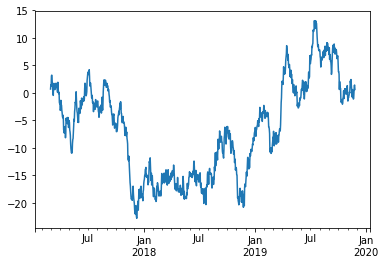

In [115]:
ts.plot()

### 文件操作

* df1=pd.read_csv("./…….csv") 读取
* df2=pd.read_excel("……"，"Sheet1")
* df1.to_csv("…….csv") 保存
* df2.to_excel("…….xlxt")